In [3]:
import pandas as pd
import json
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
train_json = json.loads(open("./PennFudanPed/PennFudanPed_train.json",'r').read())
val_json = json.loads(open("./PennFudanPed/PennFudanPed_val.json",'r').read())

In [5]:
df1 = pd.json_normalize(train_json["annotations"])
df1

,area,iscrowd,bbox,category_id,image_id,id,ignore,segmentation
0,35947,0,"[66.0, 60.0, 103.0, 349.0]",1,0,0,0,[]
1,28812,0,"[154.0, 90.0, 98.0, 294.0]",1,0,1,0,[]
2,28809,0,"[227.0, 93.0, 97.0, 297.0]",1,0,2,0,[]
3,28710,0,"[416.0, 100.0, 99.0, 290.0]",1,0,3,0,[]
4,39615,0,"[594.0, 111.0, 139.0, 285.0]",1,0,4,0,[]
...,...,...,...,...,...,...,...,...
278,28595,0,"[146.0, 83.0, 95.0, 301.0]",1,118,278,0,[]
279,24871,0,"[233.0, 69.0, 77.0, 323.0]",1,118,279,0,[]
280,23144,0,"[341.0, 87.0, 88.0, 263.0]",1,118,280,0,[]
281,6375,0,"[12.0, 57.0, 51.0, 125.0]",1,118,281,0,[]


In [5]:
# np.bincount(list(df1['image_id']))

In [6]:
# f = open('.\\PennFudanPed\\PennFudanPed_full.json',)
# data = json.load(f)
# df = pd.json_normalize(data['images'])
# df

In [6]:
img = cv2.imread('PennFudanPed/PNGImages/PennPed00004.png')
bboxes = list(df1.loc[df1['image_id'] == 0]['bbox'])

In [7]:
bboxes

[[66.0, 60.0, 103.0, 349.0],
 [154.0, 90.0, 98.0, 294.0],
 [227.0, 93.0, 97.0, 297.0],
 [416.0, 100.0, 99.0, 290.0],
 [594.0, 111.0, 139.0, 285.0]]

In [19]:
bboxes

[[201.0, 83.0, 139.0, 282.0]]

# Pretrained HOG Detector

In [67]:
# https://debuggercafe.com/opencv-hog-hyperparameter-tuning-for-accurate-and-fast-person-detection/

In [1]:
import pandas as pd
import json
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# def draw_rectangles(image, bboxes):
#     rects = bboxes[0]
#     weights = bboxes[1]
#     for i, (x, y, w, h) in enumerate(rects):
#         if weights[i] < 0.13:
#             continue
#         elif weights[i] < 0.3 and weights[i] > 0.13:
#             cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 2)
#         if weights[i] < 0.7 and weights[i] > 0.3:
#             cv2.rectangle(image, (x, y), (x+w, y+h), (50, 122, 255), 2)
#         if weights[i] > 0.7:
#             cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
#     cv2.putText(image, 'High confidence', (10, 15), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
#     cv2.putText(image, 'Moderate confidence', (10, 35), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (50, 122, 255), 2)
#     cv2.putText(image, 'Low confidence', (10, 55), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
#     return image

In [4]:
hog = cv2.HOGDescriptor()
hog.setSVMDetector(hog.getDefaultPeopleDetector())

In [7]:
print(hog.winSize, hog.blockSize, hog.blockStride, hog.cellSize, hog.nbins, hog.histogramNormType)

(64, 128) (16, 16) (8, 8) (8, 8) 9 0


In [8]:
img = cv2.imread('PennFudanPed/PNGImages/FudanPed00018.png')
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [10]:
img.shape

(323, 253, 3)

In [148]:
bboxes, scores = hog.detectMultiScale(img) # , winStride=(2, 2), padding=(10, 10), scale=1.02)

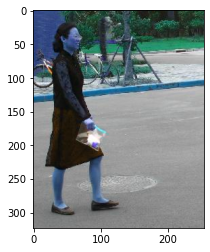

In [149]:
plt.imshow(img)

In [151]:
bboxes

()

In [127]:
rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in bboxes])
pick = non_max_suppression(rects, probs=None, overlapThresh=0.65)

In [128]:
pick

array([[613, 216, 716, 423],
       [402, 161, 533, 423],
       [ 58, 246, 141, 412],
       [192,  73, 361, 411],
       [ 79,  74, 176, 267]])

In [129]:
scores[(pick[0] == rects).mean(axis=1) == 1]

array([[0.57365357]])

In [65]:
img = draw_rectangles(img, hog.detectMultiScale(img))

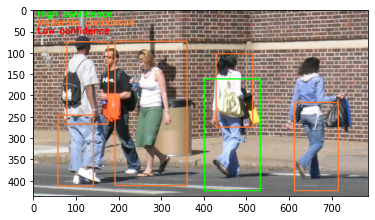

In [66]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img) # , cmap='gray')
plt.show()

In [69]:
from imutils.object_detection import non_max_suppression

In [142]:
def draw_rectangles(img, bboxes, scores):
    for idx, (x, y, w, h) in enumerate(bboxes):
        cv2.rectange(img, (x,y), (x+w,y+h), (0,255,0), 2)
    return img

def do_NMS(bboxes, scores):
    # changes x,y,w,h to x,y,x2,y2
    for idx in range(bboxes.shape[0]):
        bboxes[idx, 2] += bboxes[idx, 0]
        bboxes[idx, 3] += bboxes[idx, 1]
    
    bboxes_nms = non_max_suppression(bboxes, probs=None, overlapThresh=0.65)
    
    # get scores for these bounding boxes
    scores_nms = []
    for bb in bboxes_nms:
        scores_nms.append(scores[(bb == bboxes).mean(axis=1) == 1][0,0])
    scores_nms = np.array(scores_nms).reshape(-1,1)

    # changes x,y,x2,y2 to x,y,w,h
    for idx in range(bboxes_nms.shape[0]):
        bboxes_nms[idx, 2] = bboxes_nms[idx, 2] - bboxes_nms[idx, 0] + 1
        bboxes_nms[idx, 3] = bboxes_nms[idx, 3] - bboxes_nms[idx, 1] + 1

    return bboxes_nms, scores_nms



In [145]:
hog = cv2.HOGDescriptor()
hog.setSVMDetector(hog.getDefaultPeopleDetector())

# predictions will be saved iteratively
predictions = []

# read the images using the file name in the json file
test_json = json.loads(open("./PennFudanPed/PennFudanPed_val.json",'r').read())
img_dicts = test_json['images']
for img_dict in img_dicts:
    img = cv2.imread(os.path.join("./", img_dict['file_name']))
    img_id = img_dict['id']

    # predict the bboxes using pretrained HoG
    bboxes, scores = hog.detectMultiScale(img)

    print(img_dict['file_name'])
    # do NMS and append the predictions in COCO format
    bboxes, scores = do_NMS(bboxes, scores)

    for bb, score in zip(bboxes, scores):
        pred = {}
        pred["image_id"] = img_id
        pred["score"] = score[0]
        pred["category_id"] = 1
        pred["bbox"] = bb
        predictions.append(pred)


PennFudanPed/PNGImages/PennPed00046.png
PennFudanPed/PNGImages/PennPed00055.png
PennFudanPed/PNGImages/PennPed00031.png
PennFudanPed/PNGImages/FudanPed00034.png
PennFudanPed/PNGImages/PennPed00001.png
PennFudanPed/PNGImages/PennPed00041.png
PennFudanPed/PNGImages/FudanPed00040.png
PennFudanPed/PNGImages/PennPed00052.png
PennFudanPed/PNGImages/PennPed00076.png
PennFudanPed/PNGImages/PennPed00014.png
PennFudanPed/PNGImages/PennPed00009.png
PennFudanPed/PNGImages/FudanPed00018.png


AttributeError: 'tuple' object has no attribute 'shape'

In [152]:
a = [{"he":1}, {"he":2}]

In [154]:
with open("output.json", "w") as f:
    json.dump(a, f)

In [155]:
json.loads(open("output.json", "r").read())

[{'he': 1}, {'he': 2}]